In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
%matplotlib inline

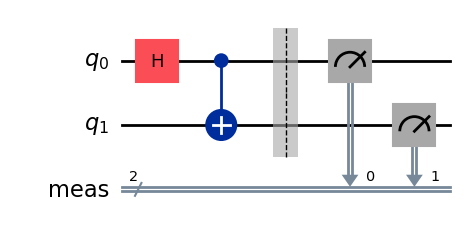

In [2]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw(output='mpl')

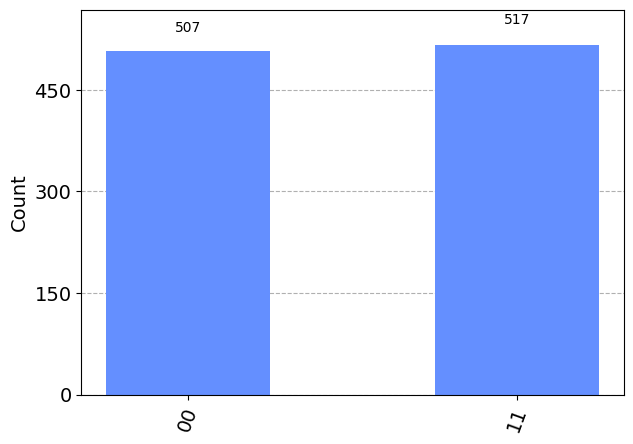

In [3]:
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit, backend=simulator).result()
plot_histogram(result.get_counts())

In [17]:
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_provider.job import job_monitor

# Replace '<INSERT YOUR IBM QUANTUM API KEY>' with your actual IBM Quantum token.
IBMProvider.save_account('<INSERT YOUR IBM QUANTUM API KEY>', overwrite=True)

provider = IBMProvider()



In [22]:
qcomp = provider.get_backend('ibmq_qasm_simulator')

job = qcomp.run(circuit)
#transpiled_circuit = transpile(circuit, qcomp)
#job = qcomp.run(transpiled_circuit)

job_monitor(job)

Job Status: job has been cancelled                 


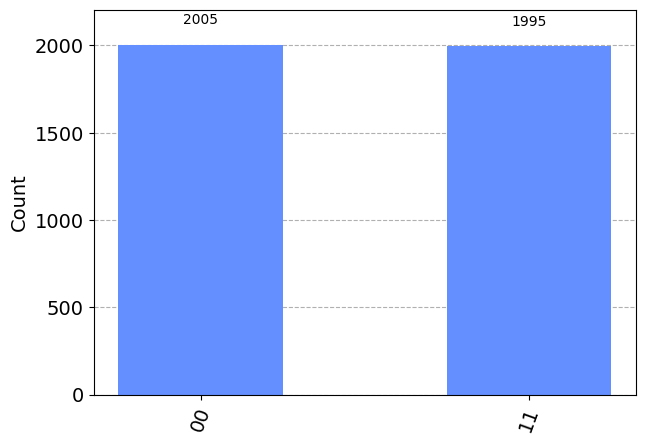

In [19]:
qcomp_result = job.result()
plot_histogram(qcomp_result.get_counts())